### Table of Contents:
* [1. Feature selection and improve accuracy of data mining results ](#1)
* &emsp;[1.1. Importing Libraries](#11)
* &emsp;[1.2. Converting categorical data to numerical](#12)
* &emsp;[1.3. Correlation Matrix](#13)
* &emsp;[1.4. Heat-Map of correlation Matrix](#14)
* &emsp;[1.5. Relevant attributes to improve the accuracy of data mining results](#15)

# 1. Feature selection and improve accuracy of data mining results <a class="anchor" id="1"></a>

Select relevant attributes from your dataset to improve the accuracy of data mining results. 

## 1.1. Importing Libraries <a class="anchor" id="11"></a>

In [3]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Converting categorical data to numerical <a class="anchor" id="12"></a>

In [4]:
df = pd.read_csv('data/training_data.csv')

In [5]:
categorical_features = ['company','rating','released','year',
                        'writer','adult','original_title','title','genres_edited',
                        'production_countries_edited','keywords_edited']
continuous_features = ['budget','score','votes']
normalized_features = [e+'_norm' for e in continuous_features]
target_features = ['isprofit','profitability_ratio']
all_features = categorical_features + continuous_features + normalized_features + target_features

In [6]:
df['company']=df['company'].astype('category').cat.codes
#df['country']=df['country'].astype('category').cat.codes
#df['director']=df['director'].astype('category').cat.codes
#df['genre']=df['genre'].astype('category').cat.codes
df['rating']=df['rating'].astype('category').cat.codes
#df['star']=df['star'].astype('category').cat.codes
df['writer']=df['writer'].astype('category').cat.codes

## 1.3. Correlation Matrix <a class="anchor" id="13"></a>

In [7]:
corr_df=df[all_features].corr()

In [8]:
corr_df

,company,rating,year,writer,adult,budget,score,votes,budget_norm,score_norm,votes_norm,isprofit,profitability_ratio
company,1.000000,-0.096399,-0.025119,0.022200,NaN,0.074787,-0.011382,0.006002,0.074787,-0.011382,0.006002,0.019499,0.021587
rating,-0.096399,1.000000,-0.036656,-0.001135,NaN,-0.179607,0.095860,0.051837,-0.179607,0.095860,0.051837,-0.087844,-0.105258
year,-0.025119,-0.036656,1.000000,-0.025734,NaN,0.229307,-0.001102,0.307421,0.229307,-0.001102,0.307421,-0.071841,-0.135737
writer,0.022200,-0.001135,-0.025734,1.000000,NaN,-0.038185,0.035933,-0.001524,-0.038185,0.035933,-0.001524,-0.020257,0.004519
adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,0.074787,-0.179607,0.229307,-0.038185,NaN,1.000000,-0.096638,0.411237,1.000000,-0.096638,0.411237,-0.070027,-0.119434
score,-0.011382,0.095860,-0.001102,0.035933,NaN,-0.096638,1.000000,0.396763,-0.096638,1.000000,0.396763,0.116909,0.124667
votes,0.006002,0.051837,0.307421,-0.001524,NaN,0.411237,0.396763,1.000000,0.411237,0.396763,1.000000,0.264890,0.254249
budget_norm,0.074787,-0.179607,0.229307,-0.038185,NaN,1.000000,-0.096638,0.411237,1.000000,-0.096638,0.411237,-0.070027,-0.119434
score_norm,-0.011382,0.095860,-0.001102,0.035933,NaN,-0.096638,1.000000,0.396763,-0.096638,1.000000,0.396763,0.116909,0.124667


## 1.4. Heat-Map of correlation Matrix <a class="anchor" id="14"></a>

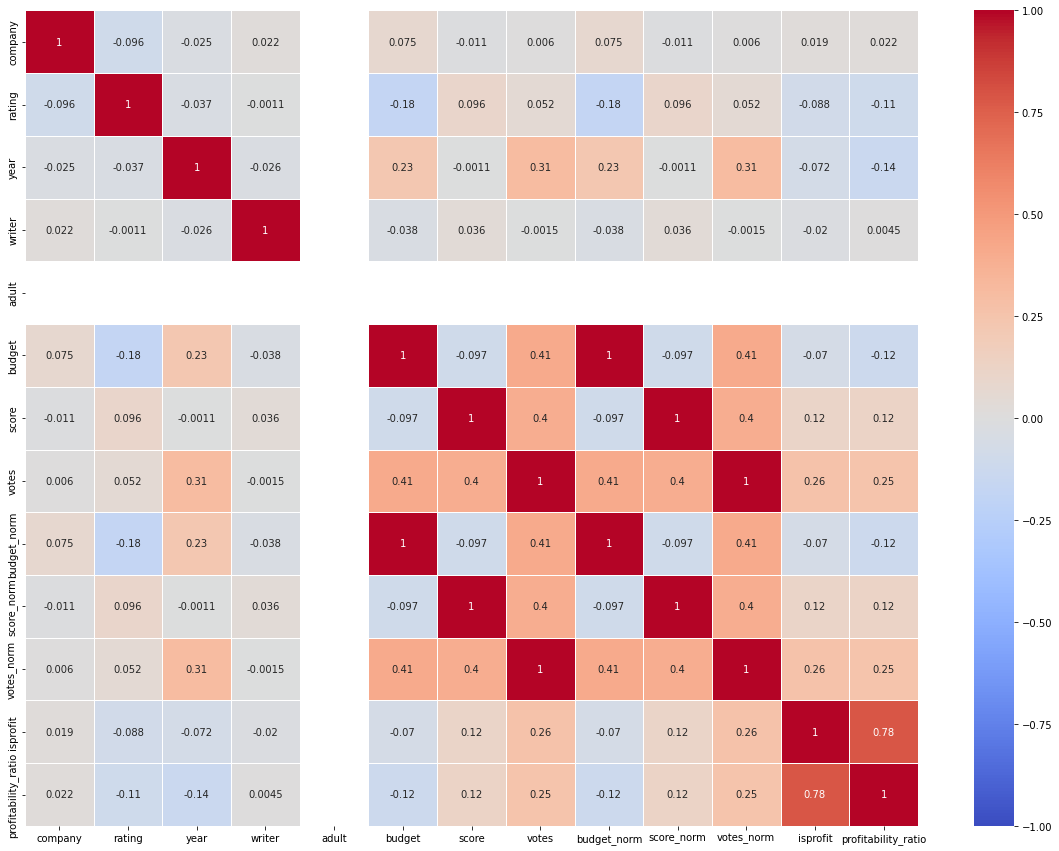

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_df,cmap='coolwarm',vmin=-1, vmax=1,annot=True,linewidth=.5);


## 1.5. Relevant attributes to improve the accuracy of data mining results <a class="anchor" id="15"></a>

In [11]:
corr_df_features = set()
for i in range(len(corr_df.columns)-2):
    if corr_df.iloc[i,11]<-0.04 or corr_df.iloc[i,11]>0.04 or \
        corr_df.iloc[i,12]<-0.04 or corr_df.iloc[i,12]>0.04:
        corr_df_features.add(corr_df.columns[i])

In [12]:
corr_df_features

{'budget',
 'budget_norm',
 'rating',
 'score',
 'score_norm',
 'votes',
 'votes_norm',
 'year'}

In [13]:
df[list(corr_df_features)+['isprofit','profitability_ratio']].to_csv('data/final_training_data.csv')